<a href="https://colab.research.google.com/github/tameemglewo/Intrusion-Detection-System-using-Machine-Learning/blob/main/CapstoneBinaryANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Once mounted, your Drive content is accessible at /content/drive/MyDrive/
# Replace 'Your_Data_Folder' with the actual name of the folder you created in Drive
data_dir = '/content/drive/MyDrive/CICIDS2017_Parquet/'

import os
# Verify that your files are there
if os.path.exists(data_dir):
    print("Contents of data directory:")
    for f in os.listdir(data_dir):
        if f.endswith('.parquet'):
            print(f)
else:
    print(f"Error: Directory not found at {data_dir}. Check your Google Drive path.")

# Now, load the files as described previously
import pandas as pd

all_parquet_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.parquet')]
dfs = []

for file_path in all_parquet_files:
    print(f"Loading {os.path.basename(file_path)}...")
    df = pd.read_parquet(file_path)
    dfs.append(df)

full_dataset = pd.concat(dfs, ignore_index=True)
print("Full dataset loaded. Shape:", full_dataset.shape)
print("Columns:", full_dataset.columns.tolist())

Mounted at /content/drive
Contents of data directory:
Botnet-Friday-no-metadata.parquet
Benign-Monday-no-metadata.parquet
Bruteforce-Tuesday-no-metadata.parquet
DDoS-Friday-no-metadata.parquet
DoS-Wednesday-no-metadata.parquet
Portscan-Friday-no-metadata.parquet
WebAttacks-Thursday-no-metadata.parquet
Infiltration-Thursday-no-metadata.parquet
Loading Botnet-Friday-no-metadata.parquet...
Loading Benign-Monday-no-metadata.parquet...
Loading Bruteforce-Tuesday-no-metadata.parquet...
Loading DDoS-Friday-no-metadata.parquet...
Loading DoS-Wednesday-no-metadata.parquet...
Loading Portscan-Friday-no-metadata.parquet...
Loading WebAttacks-Thursday-no-metadata.parquet...
Loading Infiltration-Thursday-no-metadata.parquet...
Full dataset loaded. Shape: (2313810, 78)
Columns: ['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Leng

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
full_dataset.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,112740690,32,16,6448,1152,403,0,201.5,204.724197,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,Benign
1,6,112740560,32,16,6448,5056,403,0,201.5,204.724197,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,Benign
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,Benign
3,17,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Benign
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Benign


In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313810 entries, 0 to 2313809
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int32  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  int32  
 6   Fwd Packet Length Max     int16  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int16  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              int32  
 19  Flow IAT Min              int32  
 20  Fwd IAT Total           

In [ ]:
full_dataset.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,...,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2.313810e+06,2313810.0,2.313810e+06,2.313810e+06,2.313810e+06
mean,1.050673e+01,1.807575e+07,1.108391e+01,1.255334e+01,6.664045e+02,1.976976e+04,2.506291e+02,2.142396e+01,6.880502e+01,8.299156e+01,...,6.537630e+00,-3.360480e+03,9.977085e+04,5.032397e+04,1.874053e+05,7.131980e+04,10172610.0,6.164091e+05,1.063716e+07,9.688133e+06
std,5.416040e+00,3.640823e+07,8.291879e+02,1.103179e+03,1.105009e+04,2.503141e+06,7.855073e+02,6.334192e+01,2.017232e+02,3.041293e+02,...,7.039324e+02,1.200084e+06,7.114314e+05,4.321654e+05,1.131814e+06,6.375820e+05,25990410.0,5.065082e+06,2.656441e+07,2.550670e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.760000e+02,2.000000e+00,1.000000e+00,3.700000e+01,2.600000e+01,2.000000e+01,0.000000e+00,8.666667e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,6.478300e+04,2.000000e+00,2.000000e+00,7.400000e+01,1.830000e+02,4.300000e+01,6.000000e+00,3.955556e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,5.856948e+06,6.000000e+00,5.000000e+00,3.560000e+02,2.306000e+03,2.740000e+02,3.900000e+01,5.400000e+01,8.499406e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,1.700000e+01,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,120000000.0,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
#See the distribution of attack types and benign traffic. This is where you'll observe the class imbalance.
full_dataset['Label'].value_counts()

,count
Label,
Benign,1977318
DoS Hulk,172846
DDoS,128014
DoS GoldenEye,10286
FTP-Patator,5931
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219
PortScan,1956


In [ ]:
#see missing values
full_dataset.isnull().sum()

,0
Protocol,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Fwd Packets Length Total,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


In [ ]:
# 1. Check for explicit infinities
# Sum boolean mask where elements are infinite
print("Checking for infinite values:")
for col in full_dataset.columns:
    if full_dataset[col].dtype in ['float64', 'int64']: # Only check numeric columns
        inf_count = np.isinf(full_dataset[col]).sum()
        if inf_count > 0:
            print(f"Column '{col}' has {inf_count} infinite values.")

# 2. Optionally, check for extremely large (or small) numbers that might represent infinities
# This is more heuristic and depends on the expected range of your data.

# Example for 'Flow Bytes/s' and 'Flow Packets/s' which are commonly affected
# Define a threshold that is clearly outside the expected range of valid data
large_number_threshold = 1e+18 # Adjust based on domain knowledge

print("\nChecking for extremely large/small values (potential infinities):")
for col in ['Flow Bytes/s', 'Flow Packets/s']: # Focus on known problematic columns first
    if col in full_dataset.columns and full_dataset[col].dtype in ['float64', 'int64']:
        # Count values above the positive threshold or below the negative threshold
        extreme_values_count = (full_dataset[col].abs() > large_number_threshold).sum()
        if extreme_values_count > 0:
            print(f"Column '{col}' has {extreme_values_count} values exceeding the threshold.")

# Example of how to find what values are actually present for problematic columns
print("\nValue counts for 'Flow Bytes/s':")
print(full_dataset['Flow Bytes/s'].value_counts(normalize=True).head())
print("\nValue counts for 'Flow Packets/s':")
print(full_dataset['Flow Packets/s'].value_counts(normalize=True).head())

Checking for infinite values:

Checking for extremely large/small values (potential infinities):

Value counts for 'Flow Bytes/s':
Flow Bytes/s
0.0           0.097284
4000000.0     0.002008
3000000.0     0.001228
12000000.0    0.000715
1000000.0     0.000698
Name: proportion, dtype: float64

Value counts for 'Flow Packets/s':
Flow Packets/s
6.666667e+05    0.004136
5.000000e+05    0.003546
2.000000e+06    0.001949
2.500000e+04    0.001523
2.000000e+04    0.001520
Name: proportion, dtype: float64


In [ ]:
# 6.666667e+05 0.004136: This means approximately 0.41% of your dataset has a Flow Packets/s value of 666,667. This is a specific, high rate.
# 5.000000e+05 0.003546, etc.: Similar to Flow Bytes/s, these are other common, high values for the packet rate.
#Parquet files seem to be in a relatively clean state regarding NaN and inf values. Don't need to perform explicit NaN or inf replacement steps.

In [ ]:
# 1. Count the number of duplicate rows
# By default, .duplicated() marks all occurrences after the first as True.
# .sum() then counts these True values.
duplicate_rows_count = full_dataset.duplicated().sum()

print(f"Number of duplicate rows found: {duplicate_rows_count}")

Number of duplicate rows found: 82004


In [ ]:
#remove duplicates
if duplicate_rows_count > 0:
    full_dataset.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_rows_count} duplicate rows.")
    print("Shape after removing duplicates:", full_dataset.shape)
else:
    print("No duplicate rows found or removed.")

Removed 82004 duplicate rows.
Shape after removing duplicates: (2231806, 78)


In [ ]:
#Step 2: Discard columns containing only a single unique value ---
# Identify columns with a single unique value
columns_to_drop_single_value = []
initial_column_count = full_dataset.shape[1]
print("\nChecking for columns with a single unique value...")
for col in full_dataset.columns:
    # Use .nunique() to count unique values, including NaN by default
    # If you want to count unique values *excluding* NaN, use .nunique(dropna=True)
    # For this task, we want to consider all actual values.
    if full_dataset[col].nunique() <= 1: # <=1 to catch columns that might be all NaN after some ops, but here implies single value
        columns_to_drop_single_value.append(col)
        print(f"  - Column '{col}' has only one unique value.")


Checking for columns with a single unique value...
  - Column 'Bwd PSH Flags' has only one unique value.
  - Column 'Bwd URG Flags' has only one unique value.
  - Column 'Fwd Avg Bytes/Bulk' has only one unique value.
  - Column 'Fwd Avg Packets/Bulk' has only one unique value.
  - Column 'Fwd Avg Bulk Rate' has only one unique value.
  - Column 'Bwd Avg Bytes/Bulk' has only one unique value.
  - Column 'Bwd Avg Packets/Bulk' has only one unique value.
  - Column 'Bwd Avg Bulk Rate' has only one unique value.


In [ ]:
#Removing columns with a single unique value
if columns_to_drop_single_value:
    full_dataset.drop(columns=columns_to_drop_single_value, inplace=True)
    print(f"Removed {len(columns_to_drop_single_value)} columns with a single unique value.")
    print("New dataset shape after removing single-value columns:", full_dataset.shape)
else:
    print("No columns found with a single unique value to remove.")

print("\nFinal dataset shape after all cleaning steps:", full_dataset.shape)
print("Remaining columns:", full_dataset.columns.tolist())

Removed 8 columns with a single unique value.
New dataset shape after removing single-value columns: (2231806, 70)

Final dataset shape after all cleaning steps: (2231806, 70)
Remaining columns: ['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Varia

In [ ]:
full_dataset.columns = full_dataset.columns.str.strip()

/tmp/ipython-input-15-802080431.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


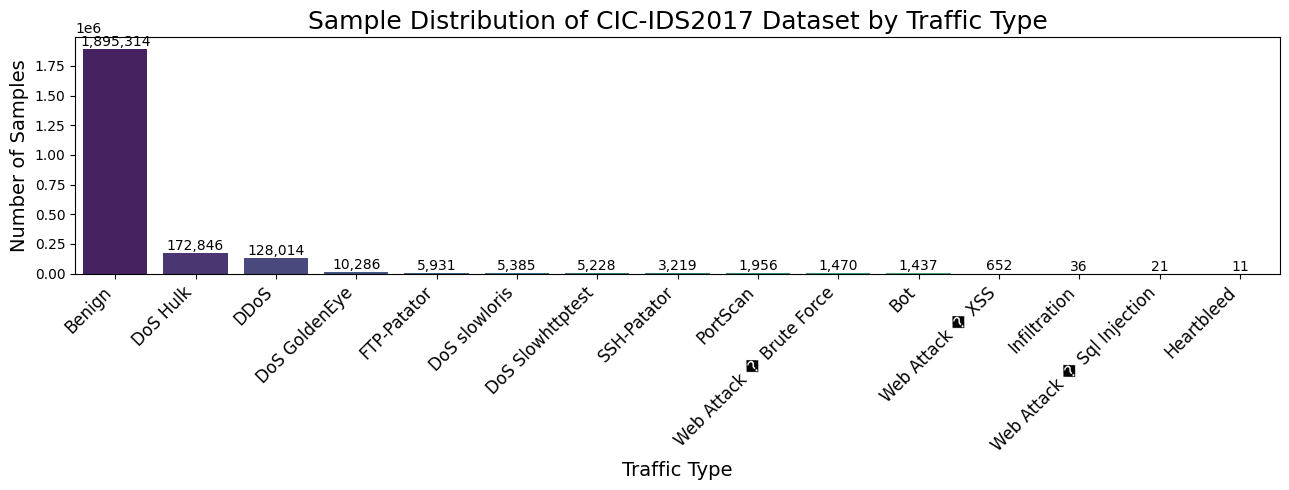


Sample Distribution of Traffic Types:
Label
Benign                        1895314
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the value counts of the 'Label' column
# The 'Label' column contains the traffic type (Benign, DDoS, PortScan, etc.)
label_counts = full_dataset['Label'].value_counts()

# Sort the counts for better visualization (optional, but often good)
label_counts = label_counts.sort_values(ascending=False)

# Create the bar graph
plt.figure(figsize=(13, 5)) # Adjust figure size as needed for readability
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

plt.title('Sample Distribution of CIC-IDS2017 Dataset by Traffic Type', fontsize=18)
plt.xlabel('Traffic Type', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12) # 'ha' (horizontal alignment) makes rotated labels look better

# Add the count values on top of each bar
for index, value in enumerate(label_counts.values):
    plt.text(index, value + 500, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Improve layout and display the plot
plt.tight_layout() # Adjusts plot to prevent labels from being cut off
plt.show()

# You can also print the raw counts
print("\nSample Distribution of Traffic Types:")
print(label_counts) ##check difference the number

In [ ]:
# --- 1. Define ALL Necessary Label Columns ---
df_processed = full_dataset.copy() # Work on a copy

# Create Binary_Label (Benign vs. Attack)
df_processed['Binary_Label'] = df_processed['Label'].apply(lambda x: 0 if x == 'Benign' else 1)

print("\nBinary Label distribution created:")
print(df_processed['Binary_Label'].value_counts())


Binary Label distribution created:
Binary_Label
0    1895314
1     336492
Name: count, dtype: int64


In [ ]:
# --- 2. Separate Features (X) from All Label Columns (y_all) like mentioned in the article
# X contains only numerical features.
# y_all contains all label columns that you might use later.
X = df_processed.drop(['Label', 'Binary_Label'], axis=1) # Drop original and new binary label from features
y_all = df_processed[['Label', 'Binary_Label']] # Keep all label columns in y_all
print("\nFeatures (X) shape:", X.shape)
print("Labels (y_all) shape:", y_all.shape)
#y_all now contains both original Label column (e.g., 'Benign', 'DDoS', etc.) and newly created Binary_Label column (0 or 1).


Features (X) shape: (2231806, 69)
Labels (y_all) shape: (2231806, 2)


In [ ]:
#minmax scaling applied
from sklearn.preprocessing import MinMaxScaler
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
scaler = MinMaxScaler()

print(f"\nScaling {len(numerical_cols)} numerical features using MinMaxScaler on ALL data...")
X_scaled = X.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])
print("Features scaled successfully.")
print("Shape of X_scaled:", X_scaled.shape)
print("First 5 rows of X_scaled (numerical features after scaling):")
print(X_scaled.head())


Scaling 69 numerical features using MinMaxScaler on ALL data...
Features scaled successfully.
Shape of X_scaled: (2231806, 69)
First 5 rows of X_scaled (numerical features after scaling):
   Protocol  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0  0.352941       0.939506           0.000141                0.000055   
1  0.352941       0.939505           0.000141                0.000055   
2  0.000000       0.947978           0.002475                0.000000   
3  1.000000       0.000834           0.000096                0.000000   
4  0.000000       0.000456           0.000014                0.000000   

   Fwd Packets Length Total  Bwd Packets Length Total  Fwd Packet Length Max  \
0                  0.000500                  0.000002               0.016237   
1                  0.000500                  0.000008               0.016237   
2                  0.000000                  0.000000               0.000000   
3                  0.000048                  0.00000

In [ ]:
#stratified sampling
print("Shape of X_scaled before sampling:", X_scaled.shape)
print("Shape of y_all before sampling:", y_all.shape)
print("Original Label distribution before sampling:\n", y_all['Label'].value_counts())

print("\n--- Performing Stratified Sampling ---")

# Define the target sample size.
target_sample_size = 200000

Shape of X_scaled before sampling: (2231806, 69)
Shape of y_all before sampling: (2231806, 2)
Original Label distribution before sampling:
 Label
Benign                        1895314
DoS Hulk                       172846
DDoS                           128014
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
PortScan                         1956
Web Attack � Brute Force         1470
Bot                              1437
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

--- Performing Stratified Sampling ---


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Check if any class is smaller than n_splits (default 1) or 1. If so, StratifiedShuffleSplit will fail.
min_class_count = y_all['Label'].value_counts().min()
if min_class_count < 2: # Or n_splits if you're doing multiple splits
    print(f"Warning: Smallest class has only {min_class_count} samples. StratifiedShuffleSplit on 'Label' might fail. Consider stratifying on 'Binary_Label' instead.")
    # Fallback to Binary_Label for stratification if multi-class is too sparse
    stratify_on = y_all['Binary_Label']
    print("Stratifying on 'Binary_Label' due to very small classes.")
else:
    stratify_on = y_all['Label']
    print("Stratifying on original 'Label' (multi-class).")
# Using StratifiedShuffleSplit for getting a single sample

sss = StratifiedShuffleSplit(n_splits=1, train_size=target_sample_size, random_state=42)

# Get the indices for the sample
# sss.split returns (train_indices, test_indices) for each split. We only need the train_indices.
for train_index, _ in sss.split(X_scaled, stratify_on):
    X_sampled = X_scaled.iloc[train_index].copy()
    y_all_sampled = y_all.iloc[train_index].copy()

print(f"Successfully created a stratified sample of size {X_sampled.shape[0]}.")
print("Shape of X_sampled:", X_sampled.shape)
print("Shape of y_all_sampled:", y_all_sampled.shape)

print("\nSampled Label distribution (multi-class):\n", y_all_sampled['Label'].value_counts())
print("\nSampled Binary Label distribution:\n", y_all_sampled['Binary_Label'].value_counts())

Stratifying on original 'Label' (multi-class).
Successfully created a stratified sample of size 200000.
Shape of X_sampled: (200000, 69)
Shape of y_all_sampled: (200000, 2)

Sampled Label distribution (multi-class):
 Label
Benign                        169846
DoS Hulk                       15489
DDoS                           11472
DoS GoldenEye                    922
FTP-Patator                      531
DoS slowloris                    483
DoS Slowhttptest                 469
SSH-Patator                      288
PortScan                         175
Web Attack � Brute Force         132
Bot                              129
Web Attack � XSS                  58
Infiltration                       3
Web Attack � Sql Injection         2
Heartbleed                         1
Name: count, dtype: int64

Sampled Binary Label distribution:
 Binary_Label
0    169846
1     30154
Name: count, dtype: int64


Shape of X_sampled before LOF: (200000, 69)
Shape of y_all_sampled before LOF: (200000, 2)

--- Starting Outlier Removal using LOF on SAMPLED and SCALED features ---
Applying LOF with n_neighbors=20 and contamination=0.05...
Found 10000 outliers based on contamination=0.05.
Removed 10000 outlier rows.
Final Features (X_cleaned_final) shape after LOF: (190000, 69)
Final Labels (y_all_cleaned_final) shape after LOF: (190000, 2)

Binary Label distribution after LOF outlier removal:
Binary_Label
0    160985
1     29015
Name: count, dtype: int64

Original Label (multi-class) distribution after LOF outlier removal:
Label
Benign                        160985
DoS Hulk                       14898
DDoS                           11102
DoS GoldenEye                    894
FTP-Patator                      526
DoS Slowhttptest                 451
DoS slowloris                    436
SSH-Patator                      279
Web Attack � Brute Force         131
PortScan                         124
Bot    

/tmp/ipython-input-21-1986897284.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y_all_cleaned_final, x='Label', order=y_all_cleaned_final['Label'].value_counts().index, palette='Set2')


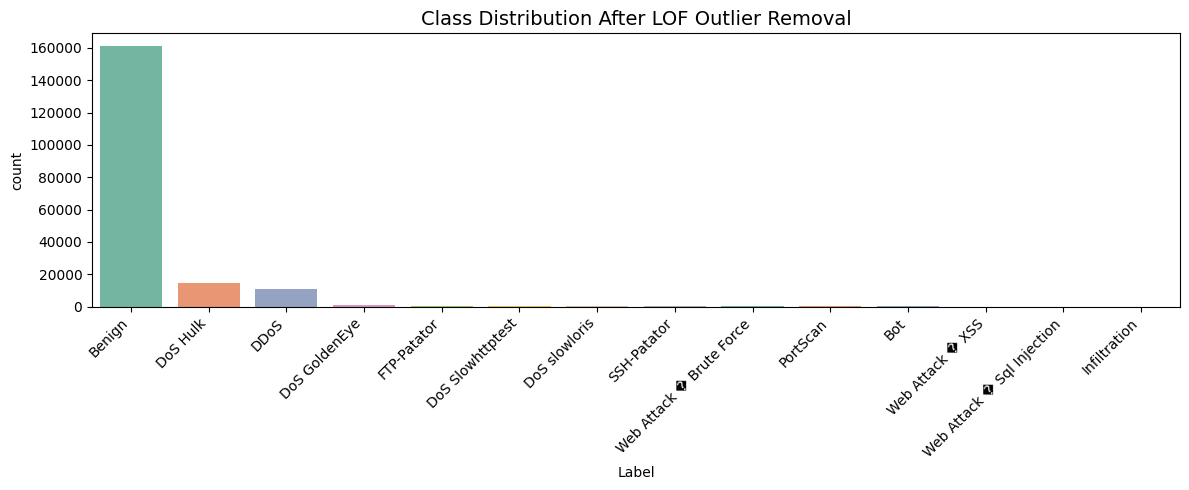

In [ ]:
# Outlier detection using Local Outlier Factor (LOF)
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic info before LOF
print("Shape of X_sampled before LOF:", X_sampled.shape)
print("Shape of y_all_sampled before LOF:", y_all_sampled.shape)

print("\n--- Starting Outlier Removal using LOF on SAMPLED and SCALED features ---")

# 2. Initialize and apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=False)
print(f"Applying LOF with n_neighbors={lof.n_neighbors} and contamination={lof.contamination}...")

outlier_predictions = lof.fit_predict(X_sampled)  # -1 for outliers, 1 for inliers
n_outliers = (outlier_predictions == -1).sum()
print(f"Found {n_outliers} outliers based on contamination={lof.contamination}.")

# 3. Remove outliers
X_cleaned_final = X_sampled[outlier_predictions == 1].copy()
y_all_cleaned_final = y_all_sampled[outlier_predictions == 1].copy()

print(f"Removed {n_outliers} outlier rows.")
print("Final Features (X_cleaned_final) shape after LOF:", X_cleaned_final.shape)
print("Final Labels (y_all_cleaned_final) shape after LOF:", y_all_cleaned_final.shape)

# 4. Label distributions AFTER LOF
print("\nBinary Label distribution after LOF outlier removal:")
print(y_all_cleaned_final['Binary_Label'].value_counts())

print("\nOriginal Label (multi-class) distribution after LOF outlier removal:")
print(y_all_cleaned_final['Label'].value_counts())

# 5. Class comparison BEFORE vs AFTER LOF
print("\n--- Class Reduction Due to LOF ---")
before_counts = y_all_sampled['Label'].value_counts()
after_counts = y_all_cleaned_final['Label'].value_counts()

class_comparison_df = pd.DataFrame({
    'Before LOF': before_counts,
    'After LOF': after_counts
}).fillna(0).astype(int)

class_comparison_df['% Reduction'] = ((class_comparison_df['Before LOF'] - class_comparison_df['After LOF']) / class_comparison_df['Before LOF'] * 100).round(2)
print(class_comparison_df.sort_values('% Reduction', ascending=False))

# 6. Optional: Visualize distribution after LOF
plt.figure(figsize=(12, 5))
sns.countplot(data=y_all_cleaned_final, x='Label', order=y_all_cleaned_final['Label'].value_counts().index, palette='Set2')
plt.title('Class Distribution After LOF Outlier Removal', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Binary class
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE # For handling class imbalance
from collections import Counter # To check distribution

print("Shape of X_cleaned_final before splitting:", X_cleaned_final.shape)
print("Shape of y_all_cleaned_final before splitting:", y_all_cleaned_final.shape)
print("Binary Label distribution before splitting:\n", y_all_cleaned_final['Binary_Label'].value_counts())

Shape of X_cleaned_final before splitting: (190000, 69)
Shape of y_all_cleaned_final before splitting: (190000, 2)
Binary Label distribution before splitting:
 Binary_Label
0    160985
1     29015
Name: count, dtype: int64


In [ ]:
# --- Step 1: Split Data into Training and Testing Sets ---
# For binary classification, we will use the 'Binary_Label' column as our target.

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_cleaned_final,
    y_all_cleaned_final['Binary_Label'],
    test_size=0.20,  # 20% for the final test set
    random_state=42,
    stratify=y_all_cleaned_final['Binary_Label']
)

print("\n--- Initial Data Split Summary (Training/Validation vs. Test) ---")
print("X_train_val shape:", X_train_val.shape)
print("y_train_val shape:", y_train_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\ny_train_val distribution (0 = Benign, 1 = Attack):")
print(y_train_val.value_counts(normalize=True))
print("\ny_test distribution (0 = Benign, 1 = Attack):")
print(y_test.value_counts(normalize=True))



--- Initial Data Split Summary (Training/Validation vs. Test) ---
X_train_val shape: (152000, 69)
y_train_val shape: (152000,)
X_test shape: (38000, 69)
y_test shape: (38000,)

y_train_val distribution (0 = Benign, 1 = Attack):
Binary_Label
0    0.847289
1    0.152711
Name: proportion, dtype: float64

y_test distribution (0 = Benign, 1 = Attack):
Binary_Label
0    0.847289
1    0.152711
Name: proportion, dtype: float64


In [ ]:
#Initialize SMOTE outside the loop for efficiency if parameters are fixed
smote = SMOTE(random_state=42, sampling_strategy='auto')


In [ ]:
# --- NEW STEP: Apply SMOTE to the training data (X_train_val, y_train_val) ---
print("\n--- Applying SMOTE to training data ---")
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_val, y_train_val)

print(f"X_train_resampled shape after SMOTE: {X_train_resampled.shape}")
print(f"y_train_resampled shape after SMOTE: {y_train_resampled.shape}")
print("\ny_train_resampled distribution (0 = Benign, 1 = Attack) after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))


# --- Step 3: Choose and Train a Binary Classification Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

print("\n--- Data Shapes for ANN ---")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Ensure data is in NumPy array format for TensorFlow (if not already)
# This is a good practice, especially if X_train_resampled is a DataFrame
X_train_np = X_train_resampled.values if isinstance(X_train_resampled, pd.DataFrame) else X_train_resampled
y_train_np = y_train_resampled.values if isinstance(y_train_resampled, pd.Series) else y_train_resampled
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_test_np = y_test.values if isinstance(y_test, pd.Series) else y_test


print("\n--- Converted Data Shapes (NumPy arrays for TensorFlow) ---")
print(f"X_train_np shape: {X_train_np.shape}")
print(f"y_train_np shape: {y_train_np.shape}")
print(f"X_test_np shape: {X_test_np.shape}")
print(f"y_test_np shape: {y_test_np.shape}")



--- Applying SMOTE to training data ---
X_train_resampled shape after SMOTE: (257576, 69)
y_train_resampled shape after SMOTE: (257576,)

y_train_resampled distribution (0 = Benign, 1 = Attack) after SMOTE:
Binary_Label
0    0.5
1    0.5
Name: proportion, dtype: float64

--- Data Shapes for ANN ---
X_train_resampled shape: (257576, 69)
y_train_resampled shape: (257576,)
X_test shape: (38000, 69)
y_test shape: (38000,)

--- Converted Data Shapes (NumPy arrays for TensorFlow) ---
X_train_np shape: (257576, 69)
y_train_np shape: (257576,)
X_test_np shape: (38000, 69)
y_test_np shape: (38000,)


In [ ]:
# --- 1. Define the ANN Model ---
# ANNs (MLPs) use Dense layers.
# Input shape for the first layer is simply the number of features.
input_dim = X_train_np.shape[1] # Assuming X_train_np is defined from your previous steps

print("\n--- Building ANN Model ---")
model = Sequential([
    # Input Layer + First Hidden Layer
    # Use 'relu' for hidden layers as it's common and effective
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3), # Dropout helps prevent overfitting

    # Second Hidden Layer
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Third Hidden Layer (Optional, you can add more or fewer)
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Output Layer for Binary Classification
    # One neuron with 'sigmoid' activation for probabilities (0 to 1)
    Dense(1, activation='sigmoid')
])

# --- Compile the model ---
# This block should be at the same indentation level as 'model = Sequential(...)'
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


--- Building ANN Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,329 (75.50 KB)

 Trainable params: 19,329 (75.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time
# --- 3. Train the Model ---
print("\n--- Training ANN Model ---")
start_time = time.time()

# Callbacks for better training management
# EarlyStopping: Stops training if validation loss doesn't improve for 'patience' epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# ModelCheckpoint: Saves the best model weights based on a monitored metric
model_checkpoint = ModelCheckpoint('best_ann_model.h5', monitor='val_loss', save_best_only=True, verbose=0)

# ReduceLROnPlateau: Reduces learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)

history = model.fit(
    X_train_np, y_train_np,
    epochs=100, # Max epochs, but EarlyStopping will likely stop it sooner
    batch_size=128, # Adjust batch size based on memory/speed
    validation_split=0.2, # Use 20% of the (resampled) training data for validation
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1 # Show training progress
)

end_time = time.time()
print(f"\nANN model training complete in {end_time - start_time:.2f} seconds.")


In [ ]:
# --- 4. Evaluate the Model ---
print("\n--- ANN Model Evaluation on Test Set ---")

# Evaluate on the original (non-SMOTEd) test set
loss, accuracy = model.evaluate(X_test_np, y_test_np, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_np).flatten() # Flatten to 1D array
# Convert probabilities to binary predictions (threshold = 0.5)
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test_np, y_pred_binary))

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test_np, y_pred_binary)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign (0)', 'Predicted Attack (1)'],
            yticklabels=['Actual Benign (0)', 'Actual Attack (1)'])
plt.title('Confusion Matrix for ANN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve and AUC Score
auc_score = roc_auc_score(y_test_np, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)

print(f"\nROC AUC Score: {auc_score:.4f}")

plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for ANN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [ ]:
# --- 5. Plot Training History ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- End of ANN Classification ---")